## Problem Statement 
The testing file for the churn dataset consists of 64,374 customer records and serves as a separate dataset for evaluating the performance and generalization capabilities of trained churn prediction models. Each record in the testing file corresponds to a customer and contains the same set of features as the training file, such as age, gender, tenure, usage frequency, support calls, payment delay, subscription type, contract length, total spend, and last interaction. However, the churn labels are not included in the testing file as they are used for assessing the accuracy and effectiveness of the churn prediction models. The testing file allows businesses to assess the predictive power of their trained models on unseen data and gain insights into how well the models generalize to new customers. By analyzing the model's performance on the testing file, businesses can gauge the effectiveness of their churn prediction strategies and make informed decisions to optimize customer retention efforts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')
df_test = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
df.shape

(440833, 12)

In [6]:
df_test.shape

(64374, 12)

In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


## Observation 
The features are almost normally distributed.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


## Data Cleaning and Preprocessing

In [9]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(np.where(df.isnull()))

(array([199295, 199295, 199295, 199295, 199295, 199295, 199295, 199295,
       199295, 199295, 199295, 199295], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64))


In [12]:
print(df.iloc[199296])

CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199296, dtype: object


In [13]:
df.drop(labels=199295, inplace = True)

In [14]:
df.reset_index(inplace = True)

In [15]:
df.iloc[199295]

index                  199296
CustomerID           204107.0
Age                      36.0
Gender                 Female
Tenure                   46.0
Usage Frequency          24.0
Support Calls             7.0
Payment Delay             1.0
Subscription Type       Basic
Contract Length       Monthly
Total Spend             118.9
Last Interaction         27.0
Churn                     1.0
Name: 199295, dtype: object

In [16]:
df.duplicated().sum()

0

There are no duplicates in this dataset.

In [17]:
df.head()

,index,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
df[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Last Interaction']] = df[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay', 'Last Interaction']].astype(dtype = 'int64')

In [19]:
df['Churn'] = df['Churn'].astype('int64')

In [20]:
df.head()

,index,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0,2.0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,1,3.0,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,2,4.0,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,3,5.0,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,4,6.0,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


In [21]:
df.value_counts('Subscription Type')

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

In [22]:
df.value_counts('Contract Length')

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [23]:
df.value_counts('Churn')

Churn
1    249999
0    190833
Name: count, dtype: int64

The data is slightly imbalanced.

## Exploratory Data Analysis

In [24]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical Features = ", numerical_feature)
print("Categorical Feature = ", categorical_feature)

Numerical Features =  ['index', 'CustomerID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']
Categorical Feature =  ['Gender', 'Subscription Type', 'Contract Length']


## Univariate Analysis

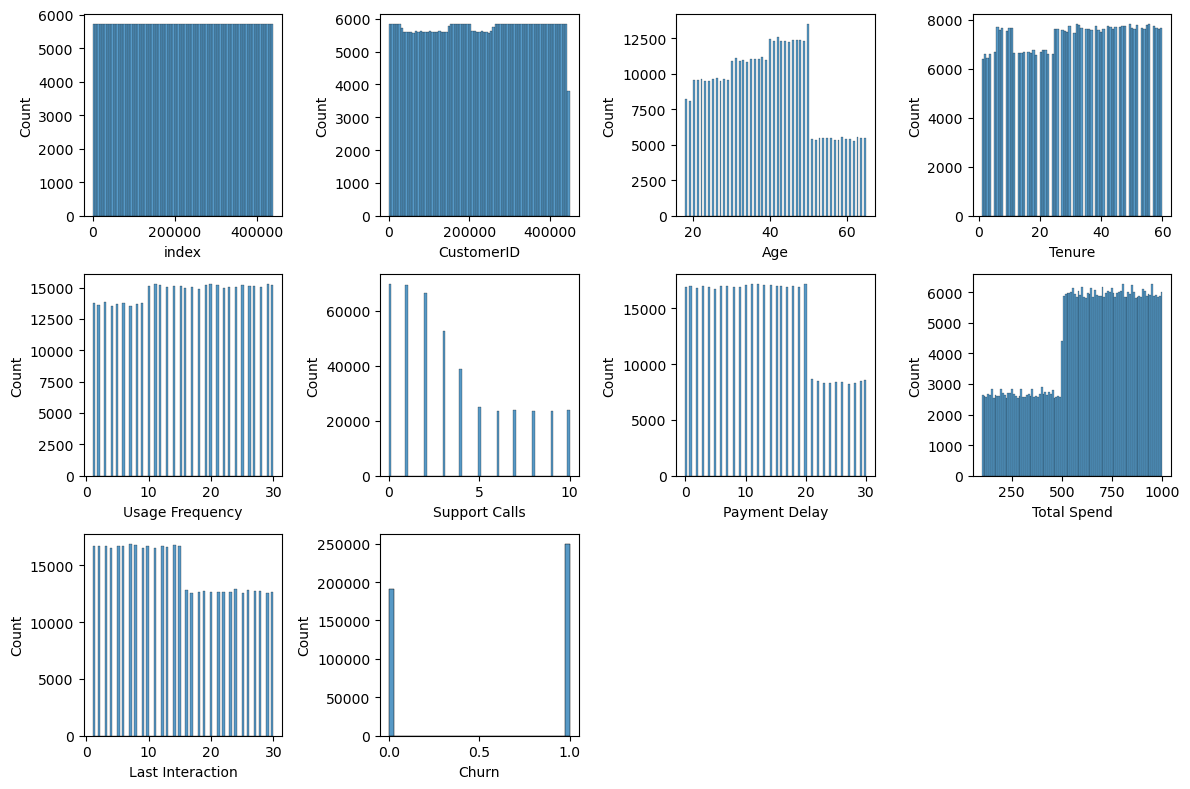

In [25]:
j= 1
plt.figure(figsize=(12,8))
for i in numerical_feature:
    plt.subplot(3,4,j)
    sns.histplot(data = df, x=i)
    j = j+1

plt.tight_layout()
plt.show()


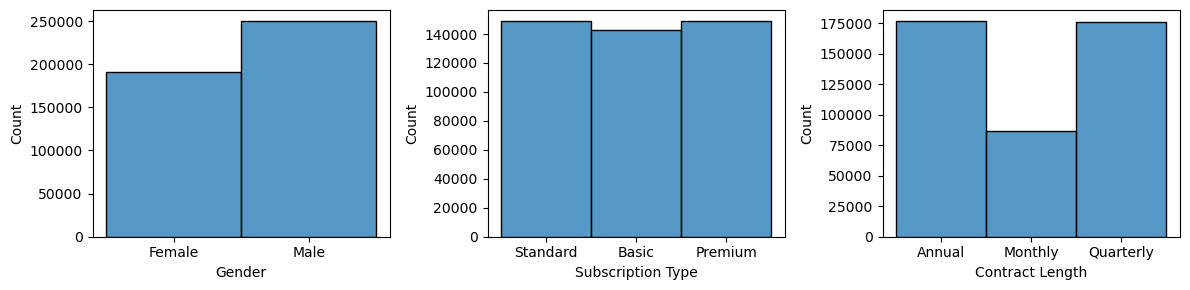

In [26]:
j= 1
plt.figure(figsize=(12,3))
for i in categorical_feature:
    plt.subplot(1,3,j)
    sns.histplot(data = df, x=i)
    j = j+1

plt.tight_layout()
plt.show()


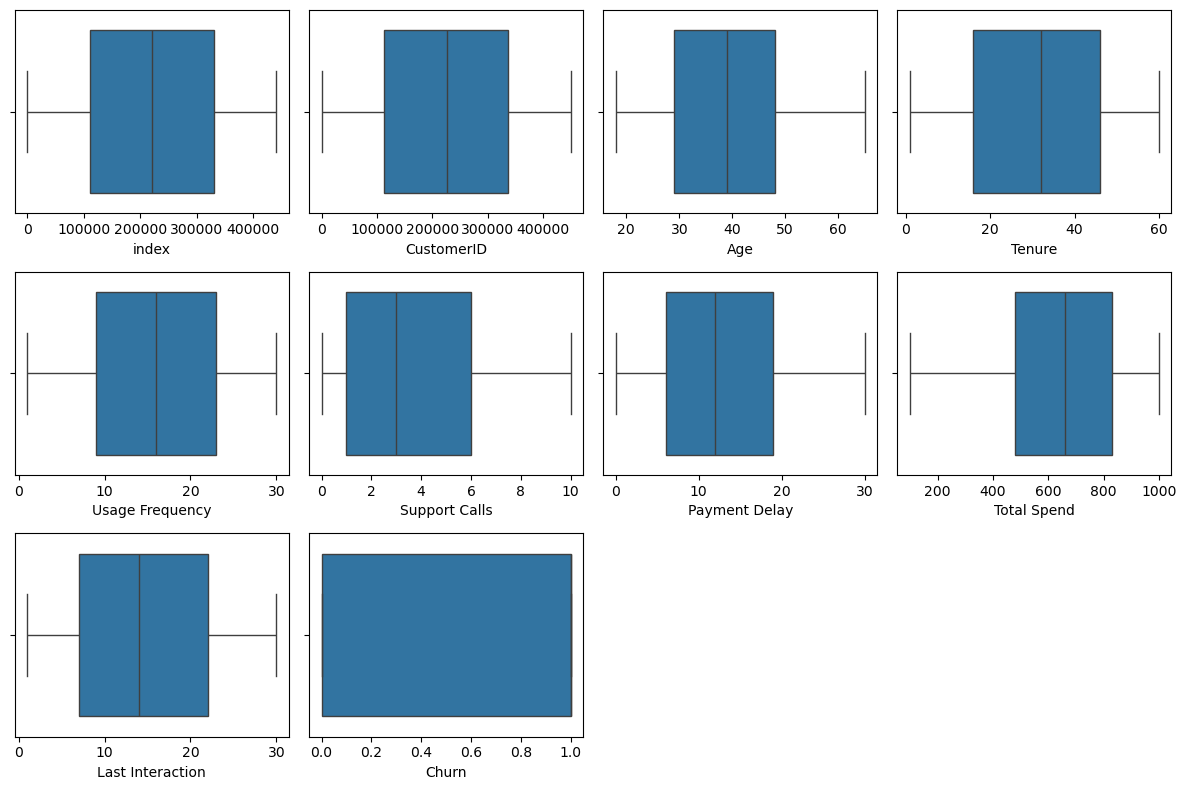

In [27]:
j= 1
plt.figure(figsize=(12,8))
for i in numerical_feature:
    plt.subplot(3,4,j)
    sns.boxplot(data = df, x=i)
    j = j+1

plt.tight_layout()
plt.show()


There are no significant outliers in this dataset.

In [28]:
## Categorical feature

In [29]:
grouped_mean = df.groupby('Subscription Type')['Total Spend'].mean()
grouped_mean

Subscription Type
Basic       628.673496
Premium     632.926463
Standard    633.132253
Name: Total Spend, dtype: float64

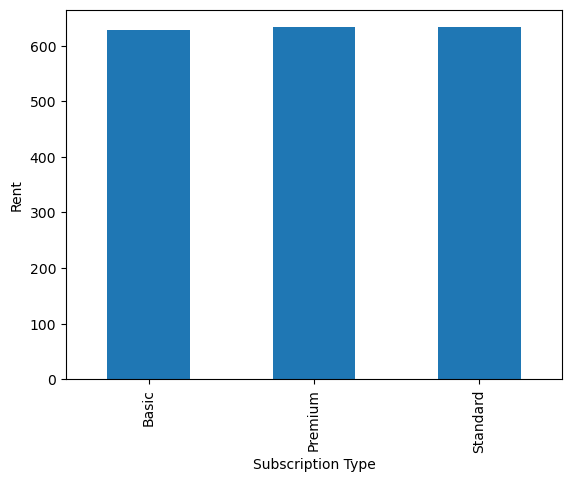

In [30]:
grouped_mean.plot(kind='bar')
plt.ylabel('Rent')
plt.show()

Total spend for all subscription types is almost equal. It does not impact the churn.

## Bivariate Analysis

In [31]:
df.columns

Index(['index', 'CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

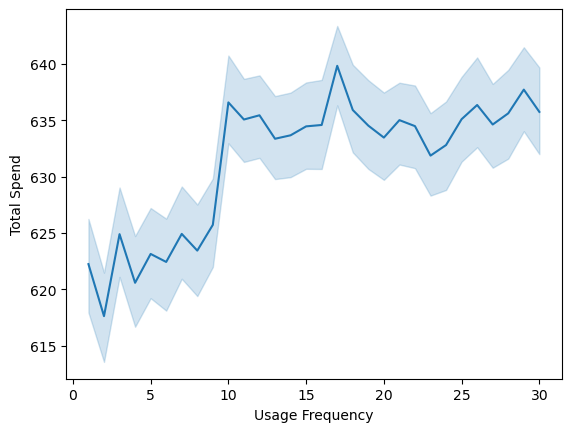

In [32]:
sns.lineplot(data = df, x = 'Usage Frequency', y = 'Total Spend')
plt.show()

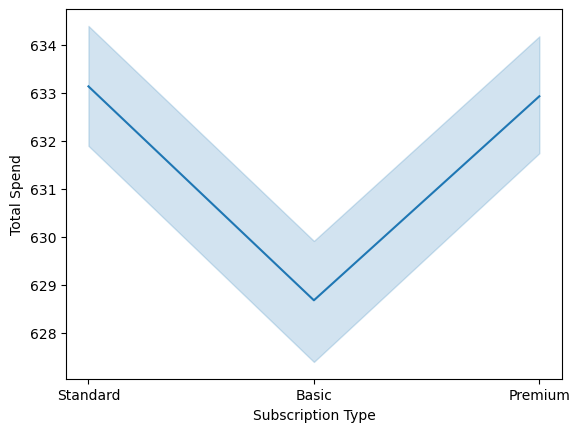

In [33]:
sns.lineplot(data = df, x = 'Subscription Type', y= 'Total Spend')
plt.show()

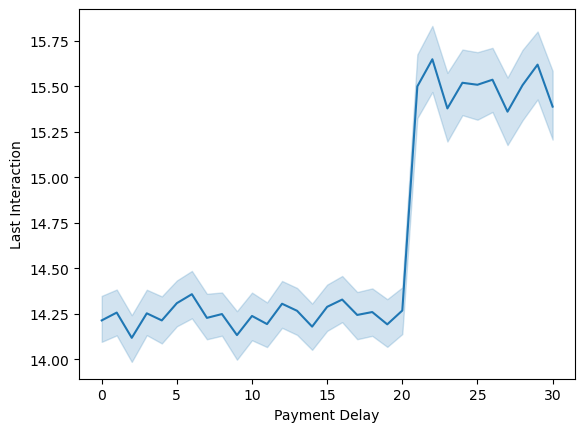

In [34]:
sns.lineplot(data = df, x='Payment Delay', y =  'Last Interaction')
plt.show()

Last interaction increases as the payment delays.

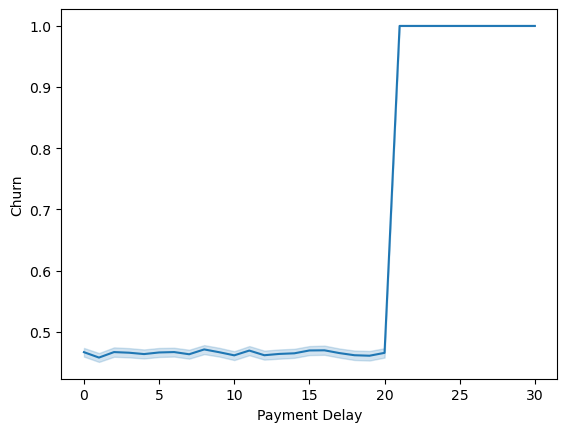

In [35]:
sns.lineplot(data = df, x ='Payment Delay', y = 'Churn' )
plt.show()

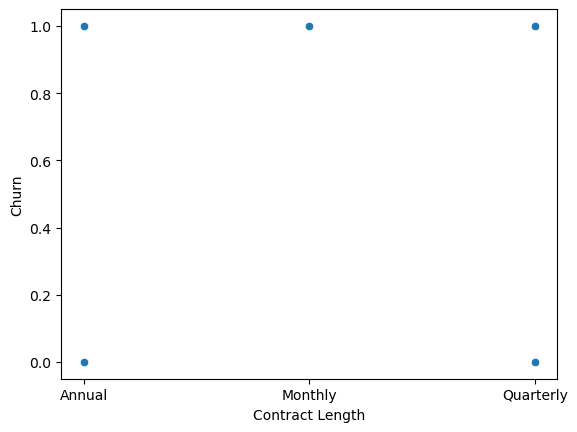

In [36]:
sns.scatterplot(data = df, x ='Contract Length', y= 'Churn' )
plt.show()

People with a monthly contract are likely to churn.

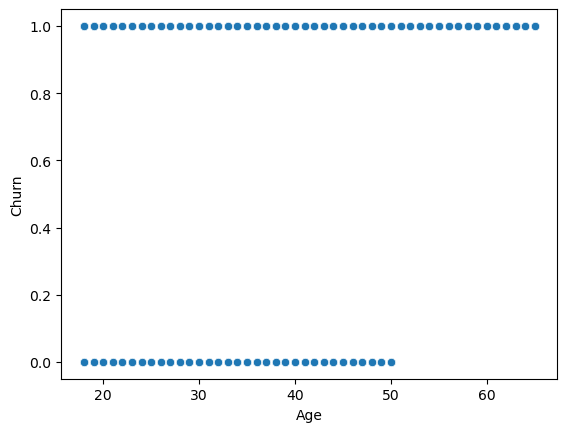

In [37]:
sns.scatterplot(data = df, x ='Age', y= 'Churn' )
plt.show()

People above 50 years of age are likely to churn

In [38]:
df.columns

Index(['index', 'CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

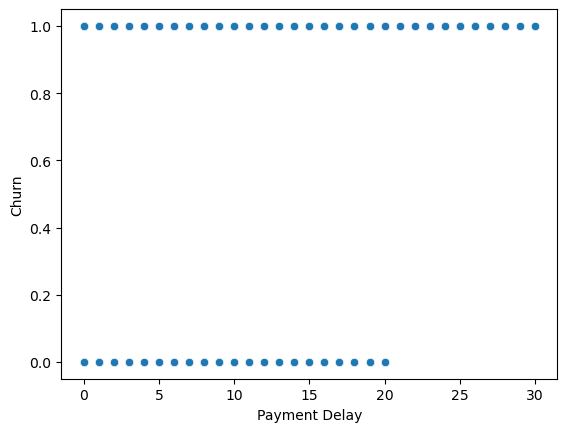

In [39]:
sns.scatterplot(data = df, x ='Payment Delay', y= 'Churn' )
plt.show()

Payment delay for over 20 days are likely to churn

## Multivariate Analysis

In [40]:
df.corr(numeric_only=True)

,index,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
index,1.000000,0.999973,-0.182179,0.044167,0.038495,-0.483407,-0.262306,0.359670,-0.125497,-0.840245
CustomerID,0.999973,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839365
Age,-0.182179,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044167,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038495,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.483407,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,-0.262306,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359670,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,-0.125497,-0.125356,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,-0.840245,-0.839365,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


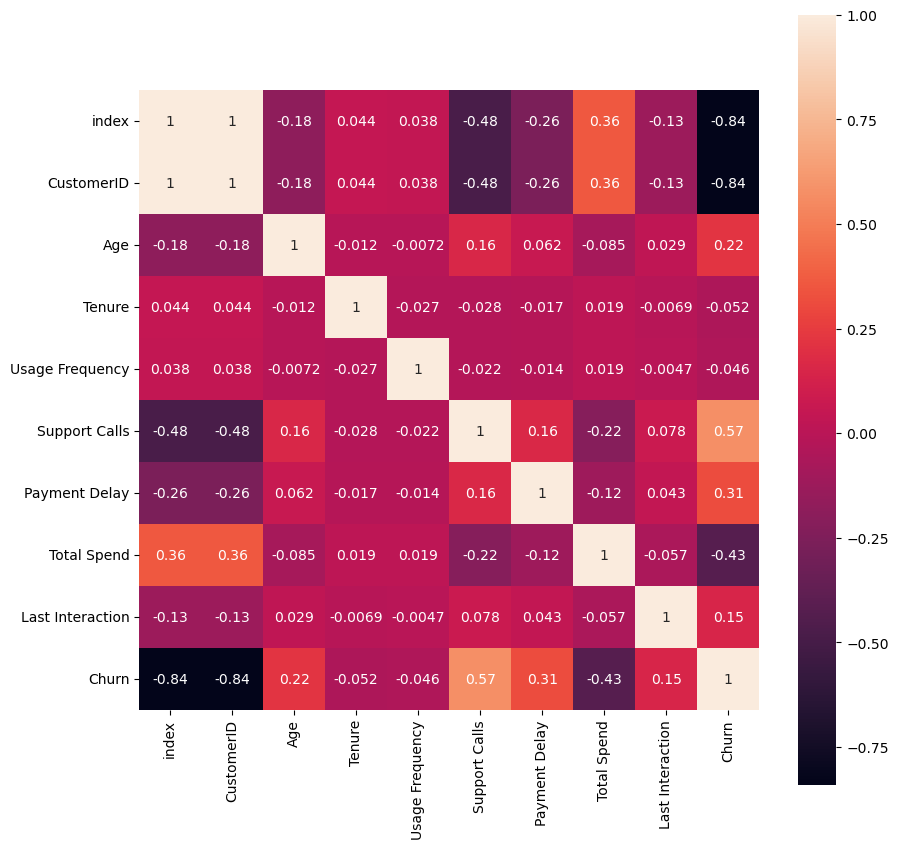

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(numeric_only = True), annot= True, square = True)
plt.show()

## Feature Engineering

In [42]:
df.drop(['index', 'CustomerID'], inplace = True, axis = 1)

In [43]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
encoding = OneHotEncoder()

In [46]:
encoded = encoding.fit_transform(df[['Gender', 'Subscription Type', 'Contract Length']]).toarray()

In [47]:
encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [48]:
encoded =  pd.DataFrame(encoded, columns=encoding.get_feature_names_out())
encoded

,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
440827,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
440828,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440829,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440830,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [49]:
encoded.index = df.index
df = pd.concat([df, encoded], axis=1)

In [50]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df.drop(['Gender', 'Subscription Type', 'Contract Length'], inplace = True, axis = 1)
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932.0,17,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65,49,1,10,8,557.0,6,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55,14,4,6,18,185.0,3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58,38,21,7,7,396.0,29,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23,32,20,5,8,617.0,20,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## Train Test Split

In [52]:
df.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn', 'Gender_Female',
       'Gender_Male', 'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

In [53]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [54]:
X.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932.0,17,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65,49,1,10,8,557.0,6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55,14,4,6,18,185.0,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58,38,21,7,7,396.0,29,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23,32,20,5,8,617.0,20,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352665, 15)
(88167, 15)
(352665,)
(88167,)


In [67]:
!pip install xgboost

  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 1.6/56.8 MB 5.2 MB/s eta 0:00:11
   - -------------------------------------- 2.6/56.8 MB 4.9 MB/s eta 0:00:12
   -- ------------------------------------- 3.7/56.8 MB 5.0 MB/s eta 0:00:11
   --- ------------------------------------ 4.7/56.8 MB 5.0 MB/s eta 0:00:11
   ---- ----------------------------------- 6.0/56.8 MB 5.1 MB/s eta 0:00:10
   ----- ---------------------------------- 7.3/56.8 MB 5.2 MB/s eta 0:00:10
   ----- ---------------------------------- 8.1/56.8 MB 5.1 MB/s eta 0:00:10
   ------ --------------------------------- 9.4/56.8 MB 5.2 MB/s eta 0:00:10
   ------- -------------------------------- 10.7/56.8 MB 5.2 MB/s eta 0:00:09
   -------- ------------------------------- 11.8/56.8 MB 5.2 MB/s eta 0:00:09
   --------

In [68]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

model = 